Simon Cole   
CS 455   
3/24/2022   
Dr. Yoshigoe

# Summary
* Loaded, described, and split the wine dataset. This portion of code was taken from assignment 2.
* Established and fit polynomial SVC and linear SVC models.
* Models were evaluated for accuracy
# References
* Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron
https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
* Dr. Yoshigoe assignment 2

Import and load the data

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from sklearn.datasets import load_wine
df = load_wine(as_frame=True)

In [47]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

Describe data

In [48]:
df.data.shape

(178, 13)

In [49]:
df.target.shape

(178,)

In [50]:
df.frame.shape

(178, 14)

In [51]:
df.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [52]:
df.frame.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [53]:
df.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Get correlations

In [54]:
corr_matrix = df.frame.corr()

In [55]:
corr_matrix["target"].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64

array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='malic_acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='ash', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcalinity_of_ash', ylabel='alcohol'>,
        <AxesSubplot:xlabel='magnesium', ylabel='alcohol'>,
        <AxesSubplot:xlabel='total_phenols', ylabel='alcohol'>,
        <AxesSubplot:xlabel='flavanoids', ylabel='alcohol'>,
        <AxesSubplot:xlabel='nonflavanoid_phenols', ylabel='alcohol'>,
        <AxesSubplot:xlabel='proanthocyanins', ylabel='alcohol'>,
        <AxesSubplot:xlabel='color_intensity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='hue', ylabel='alcohol'>,
        <AxesSubplot:xlabel='od280/od315_of_diluted_wines', ylabel='alcohol'>,
        <AxesSubplot:xlabel='proline', ylabel='alcohol'>,
        <AxesSubplot:xlabel='target', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>,
        <AxesSubplot:xlabel='malic_acid', ylabel='malic_acid'

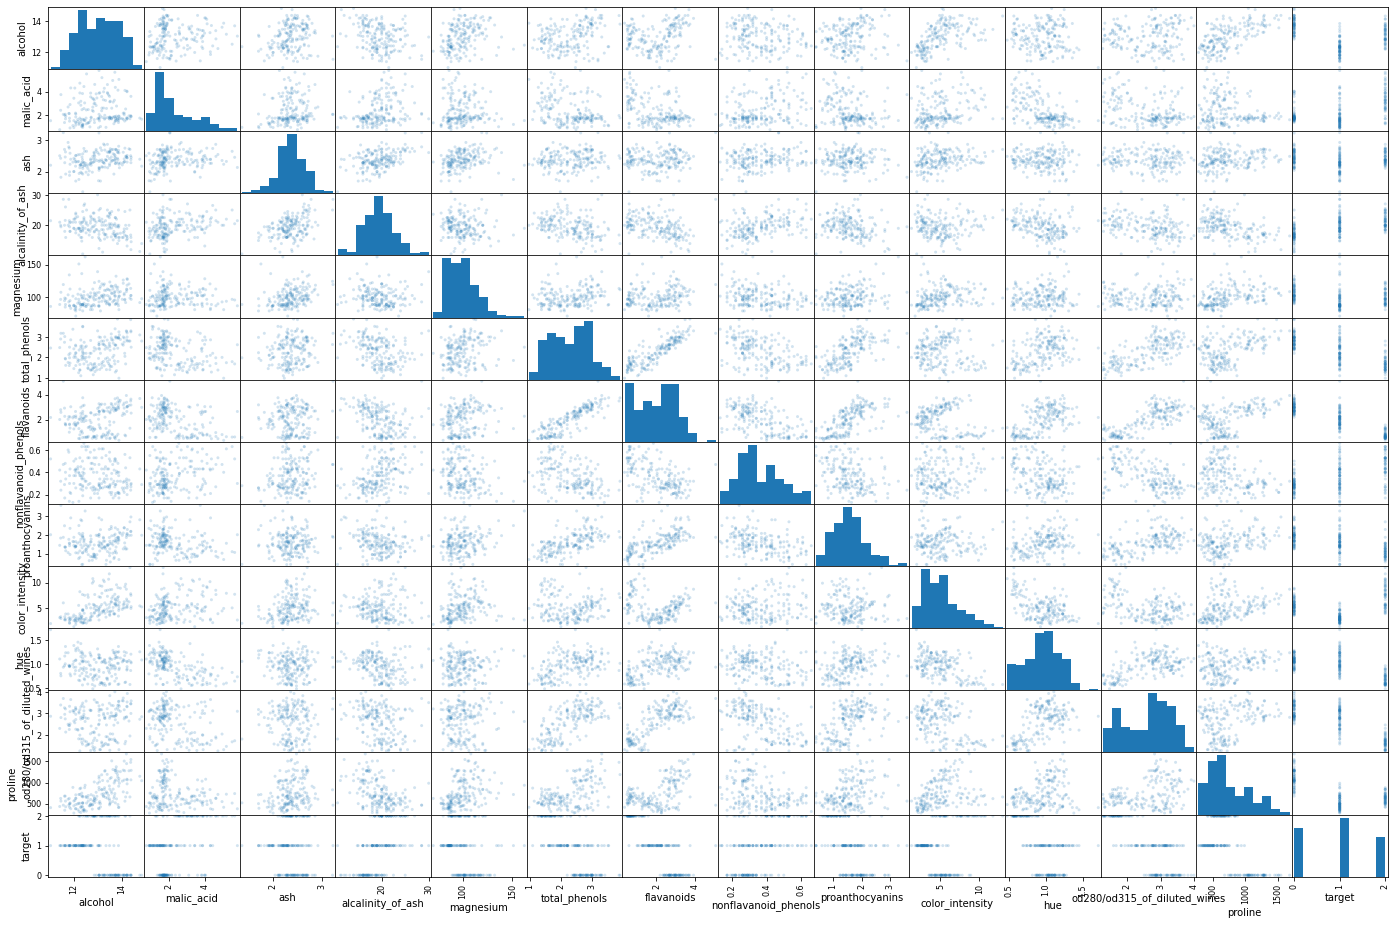

In [56]:
pd.plotting.scatter_matrix(df.frame, figsize=(24, 16), alpha=0.2)

In [57]:
corr_matrix["flavanoids"].sort_values(ascending=False)

flavanoids                      1.000000
total_phenols                   0.864564
od280/od315_of_diluted_wines    0.787194
proanthocyanins                 0.652692
hue                             0.543479
proline                         0.494193
alcohol                         0.236815
magnesium                       0.195784
ash                             0.115077
color_intensity                -0.172379
alcalinity_of_ash              -0.351370
malic_acid                     -0.411007
nonflavanoid_phenols           -0.537900
target                         -0.847498
Name: flavanoids, dtype: float64

(0.0, 5.0, 0.0, 2.1)

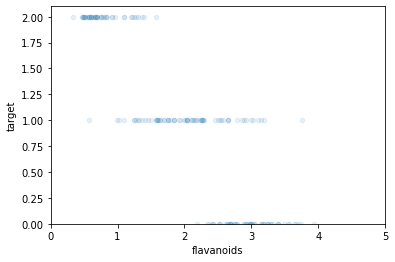

In [58]:
df.frame.plot(kind="scatter", x="flavanoids", y="target", alpha=0.1)
plt.axis([0, 5, 0, 2.1])

In [59]:
corr_matrix["od280/od315_of_diluted_wines"].sort_values(ascending=False)

od280/od315_of_diluted_wines    1.000000
flavanoids                      0.787194
total_phenols                   0.699949
hue                             0.565468
proanthocyanins                 0.519067
proline                         0.312761
alcohol                         0.072343
magnesium                       0.066004
ash                             0.003911
alcalinity_of_ash              -0.276769
malic_acid                     -0.368710
color_intensity                -0.428815
nonflavanoid_phenols           -0.503270
target                         -0.788230
Name: od280/od315_of_diluted_wines, dtype: float64

(0.0, 5.0, 0.0, 2.1)

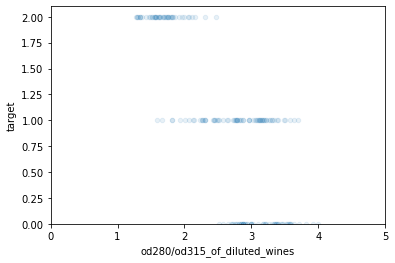

In [60]:
df.frame.plot(kind="scatter", x="od280/od315_of_diluted_wines", y="target", alpha=0.1)
plt.axis([0, 5, 0, 2.1])

In [61]:
corr_matrix["total_phenols"].sort_values(ascending=False)

total_phenols                   1.000000
flavanoids                      0.864564
od280/od315_of_diluted_wines    0.699949
proanthocyanins                 0.612413
proline                         0.498115
hue                             0.433681
alcohol                         0.289101
magnesium                       0.214401
ash                             0.128980
color_intensity                -0.055136
alcalinity_of_ash              -0.321113
malic_acid                     -0.335167
nonflavanoid_phenols           -0.449935
target                         -0.719163
Name: total_phenols, dtype: float64

(0.0, 5.0, 0.0, 2.1)

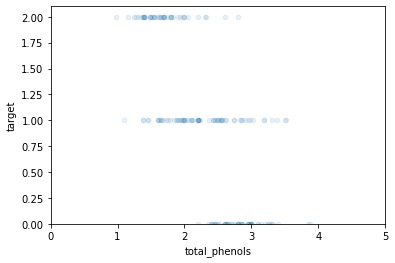

In [62]:
df.frame.plot(kind="scatter", x="total_phenols", y="target",
             alpha=0.1)
plt.axis([0, 5, 0, 2.1])

Split the data

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df.frame, df.target):
    strat_train_set = df.frame.loc[train_index]
    strat_test_set = df.frame.loc[test_index]

In [64]:
strat_train_set.shape

(124, 14)

In [65]:
strat_test_set.shape

(54, 14)

In [66]:
wine_tr = strat_train_set.drop("target", axis=1)

In [67]:
wine_labels = strat_train_set["target"].copy()

In [68]:
wine_tr.shape

(124, 13)

In [69]:
wine_labels.shape

(124,)

In [70]:
wine_test = strat_test_set.drop("target", axis=1)

In [71]:
wine_labels_test = strat_test_set["target"].copy()

In [72]:
wine_test.shape

(54, 13)

In [73]:
wine_labels_test.shape

(54,)

Establish models and preprocess

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
std = StandardScaler()

wine_tr_std = std.fit_transform(wine_tr)
wine_test_std = std.transform(wine_test)

SVC_model = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='poly', degree=3, coef0=1, C=5, random_state=42))
])

lin_SVC_model = Pipeline([
    ('scaler', StandardScaler()),
    ('linSVC', LinearSVC(C=1, ))
])


Fit models

In [215]:
SVC_model.fit(wine_tr, wine_labels)

lin_SVC_model.fit(wine_tr, wine_labels)

Pipeline(steps=[('scaler', StandardScaler()), ('linSVC', LinearSVC(C=1))])

Cross evaluate

In [216]:
from sklearn.model_selection import cross_val_score

svc_scores = cross_val_score(SVC_model, wine_tr, wine_labels, scoring='neg_mean_squared_error', cv=5)
svc_rmse_scores = np.sqrt(-svc_scores)
print(svc_rmse_scores)

lin_svc_scores = cross_val_score(lin_SVC_model, wine_tr, wine_labels, scoring='neg_mean_squared_error', cv=5)
lin_svc_scores = np.sqrt(-lin_svc_scores)
print(lin_svc_scores)

[0.         0.2        0.         0.         0.20412415]
[0.2        0.2        0.         0.         0.20412415]


Make predictions

In [223]:
SVC_predictions = SVC_model.predict(wine_test)
print(list(SVC_predictions))
print(list(wine_labels_test))

print("*" * 100)

lin_SVC_predictions = lin_SVC_model.predict(wine_test)
print(list(lin_SVC_predictions))
print(list(wine_labels_test))

[0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0]
[0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0]
****************************************************************************************************
[0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0]
[0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0]


Show confusion matrix

In [224]:
from sklearn.metrics import confusion_matrix

conf_mat_SVC = confusion_matrix(wine_labels_test, SVC_predictions)
print(conf_mat_SVC)

print("*" * 100)

conf_mat_lin_SVC = confusion_matrix(wine_labels_test, lin_SVC_predictions)
print(conf_mat_lin_SVC)

[[18  0  0]
 [ 1 20  0]
 [ 0  1 14]]
****************************************************************************************************
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


Accuracy

In [227]:
SVC_accuracy = SVC_model.score(wine_test, wine_labels_test)
print(SVC_accuracy)

print("*" * 100)

lin_SVC_accuracy = lin_SVC_model.score(wine_test, wine_labels_test)
print(lin_SVC_accuracy)



0.9629629629629629
****************************************************************************************************
0.9814814814814815


Precision

In [230]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(wine_labels_test, SVC_predictions, average = "weighted"))

print(precision_score(wine_labels_test, lin_SVC_predictions, average = "weighted"))


0.9639376218323586
0.9824561403508772


Recall Score

In [233]:
print(recall_score(wine_labels_test, SVC_predictions, average="weighted"))

print(recall_score(wine_labels_test, lin_SVC_predictions, average="weighted"))


0.9629629629629629
0.9814814814814815


F1

In [236]:
from sklearn.metrics import f1_score

print(f1_score(wine_labels_test, SVC_predictions, average= None))

print(f1_score(wine_labels_test, lin_SVC_predictions, average= None))



[0.97297297 0.95238095 0.96551724]
[0.97297297 0.97560976 1.        ]
